In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openaq
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Set major seaborn asthetics
sns.set("notebook", style='ticks', font_scale=1.0)

# Increase the quality of inline plots
mpl.rcParams['figure.dpi']= 500

api = openaq.OpenAQ()

In [2]:
#Possible parameters of interest

res = api.parameters(df=True)

print (res)

                                         description    id   name  \
0                                       Black Carbon    bc     BC   
1                                    Carbon Monoxide    co     CO   
2                                   Nitrogen Dioxide   no2    NO2   
3                                              Ozone    o3     O3   
4  Particulate matter less than 10 micrometers in...  pm10   PM10   
5  Particulate matter less than 2.5 micrometers i...  pm25  PM2.5   
6                                     Sulfur Dioxide   so2    SO2   

  preferredUnit  
0         µg/m³  
1           ppm  
2           ppm  
3           ppm  
4         µg/m³  
5         µg/m³  
6           ppm  


In [3]:
resp = api.cities(df=True, limit=100000)

print (resp.query("country == 'US'"))

                                  city   count country  locations
1834                            Bishop  270399      US         15
1835                             PERRY   42759      US          3
1836                      Indianapolis  313065      US         14
1837  Minneapolis-St. Paul-Bloomington  409772      US         14
1838              Omaha-Council Bluffs  198010      US          9
1839                            SKAGIT   61305      US          3
1840                        SWEETWATER   54555      US          2
1841                       San Antonio  147520      US          7
1842                            Berlin   25921      US          2
1843               Harrisburg-Carlisle   62606      US          6
1844                           Salinas    1133      US          6
1845                         SAN DIEGO   16917      US          1
1846                          MONTEREY    6866      US          5
1847   Tampa-St. Petersburg-Clearwater  271975      US          9
1848      

In [4]:
res = api.locations(city='Boston-Cambridge-Quincy', df=True)


print(res)
print(res.ix[0])

                      city  coordinates.latitude  coordinates.longitude  \
0  Boston-Cambridge-Quincy              42.34890              -71.09770   
1  Boston-Cambridge-Quincy              42.36310              -71.05420   
2  Boston-Cambridge-Quincy              42.32940              -71.08250   
3  Boston-Cambridge-Quincy              42.62670              -71.36220   
4  Boston-Cambridge-Quincy              42.21170              -71.11440   
5  Boston-Cambridge-Quincy              42.77080              -71.10280   
6  Boston-Cambridge-Quincy              42.47470              -70.97190   
7  Boston-Cambridge-Quincy              43.04527              -70.71396   
8  Boston-Cambridge-Quincy              43.07537              -70.74802   
9  Boston-Cambridge-Quincy              42.62670              -71.36220   

   count country  distance        firstUpdated         lastUpdated  \
0  17839      US    302805 2016-03-10 07:00:00 2019-02-03 23:00:00   
1   3267      US    306605 2016-03

In [5]:
res = api.locations(city='Boston-Cambridge-Quincy', parameter='pm25', df=True)

res.head(10)

,city,coordinates.latitude,coordinates.longitude,count,country,distance,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Boston-Cambridge-Quincy,42.36310,-71.05420,3267,US,1721753,2016-03-10 07:00:00,2018-04-04 14:00:00,Boston - North End,[pm25],AirNow,[AirNow]
1,Boston-Cambridge-Quincy,42.32940,-71.08250,7012,US,1719290,2016-03-11 17:00:00,2019-02-03 23:00:00,Boston - Roxbury,[pm25],AirNow,[AirNow]
2,Boston-Cambridge-Quincy,42.77080,-71.10280,9427,US,1720095,2016-03-10 07:00:00,2019-02-03 23:00:00,Haverhill,[pm25],AirNow,[AirNow]
3,Boston-Cambridge-Quincy,42.47470,-70.97190,9019,US,1729013,2016-03-10 07:00:00,2019-02-03 23:00:00,LYNN,[pm25],AirNow,[AirNow]
4,Boston-Cambridge-Quincy,43.07537,-70.74802,7560,US,1751328,2016-03-10 07:00:00,2019-02-03 23:00:00,Portsmouth,[pm25],AirNow,[AirNow]


In [10]:
res = api.measurements(city='Boston-Cambridge-Quincy', parameter='pm25', limit=10000, df=True)

# Print out the statistics on a per-location basiss
res.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Boston - Roxbury,1763.0,9.071469,4.465341,-2.0,6.0,8.0,12.0,57.0
Haverhill,1747.0,6.636520,5.254365,-4.0,3.0,6.0,9.0,35.0
LYNN,1509.0,5.667992,4.213206,-4.0,3.0,5.0,8.0,28.0
Portsmouth,1648.0,4.520267,4.956101,-4.9,0.9,4.0,7.5,26.7


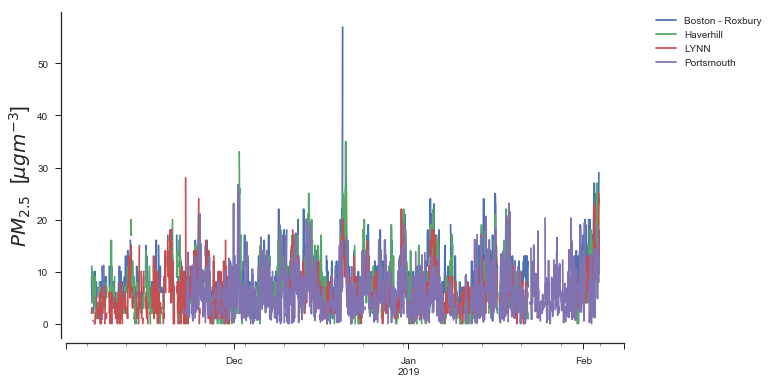

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 6))

for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to hourly
    _df = df.query("value >= 0.0").resample('1h').mean()

    _df.value.plot(ax=ax, label=group)

ax.legend(loc='best')
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("")
sns.despine(offset=5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

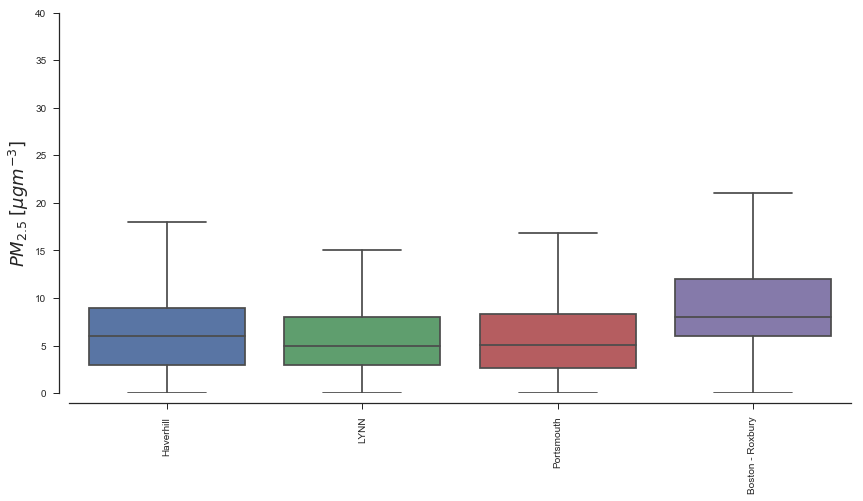

In [8]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='location',
    y='value',
    data=res.query("value >= 0.0"),
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 40])
ax.set_ylabel("$PM_{2.5}\;[\mu gm^{-3}]$", fontsize=18)
ax.set_xlabel("")

sns.despine(offset=10)

plt.xticks(rotation=90)
plt.show()